In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split # train and test 
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
import imblearn
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.datasets import make_classification

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB as MB

In [2]:
df=pd.read_csv("creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
df = df.sample(n = 20000)

In [4]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
columns=df.columns[:-1]
columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [6]:
columns_str=''
for i in df.columns:
    columns_str=columns_str+i+'+'
columns_str

'Time+V1+V2+V3+V4+V5+V6+V7+V8+V9+V10+V11+V12+V13+V14+V15+V16+V17+V18+V19+V20+V21+V22+V23+V24+V25+V26+V27+V28+Amount+Class+'

<AxesSubplot:>

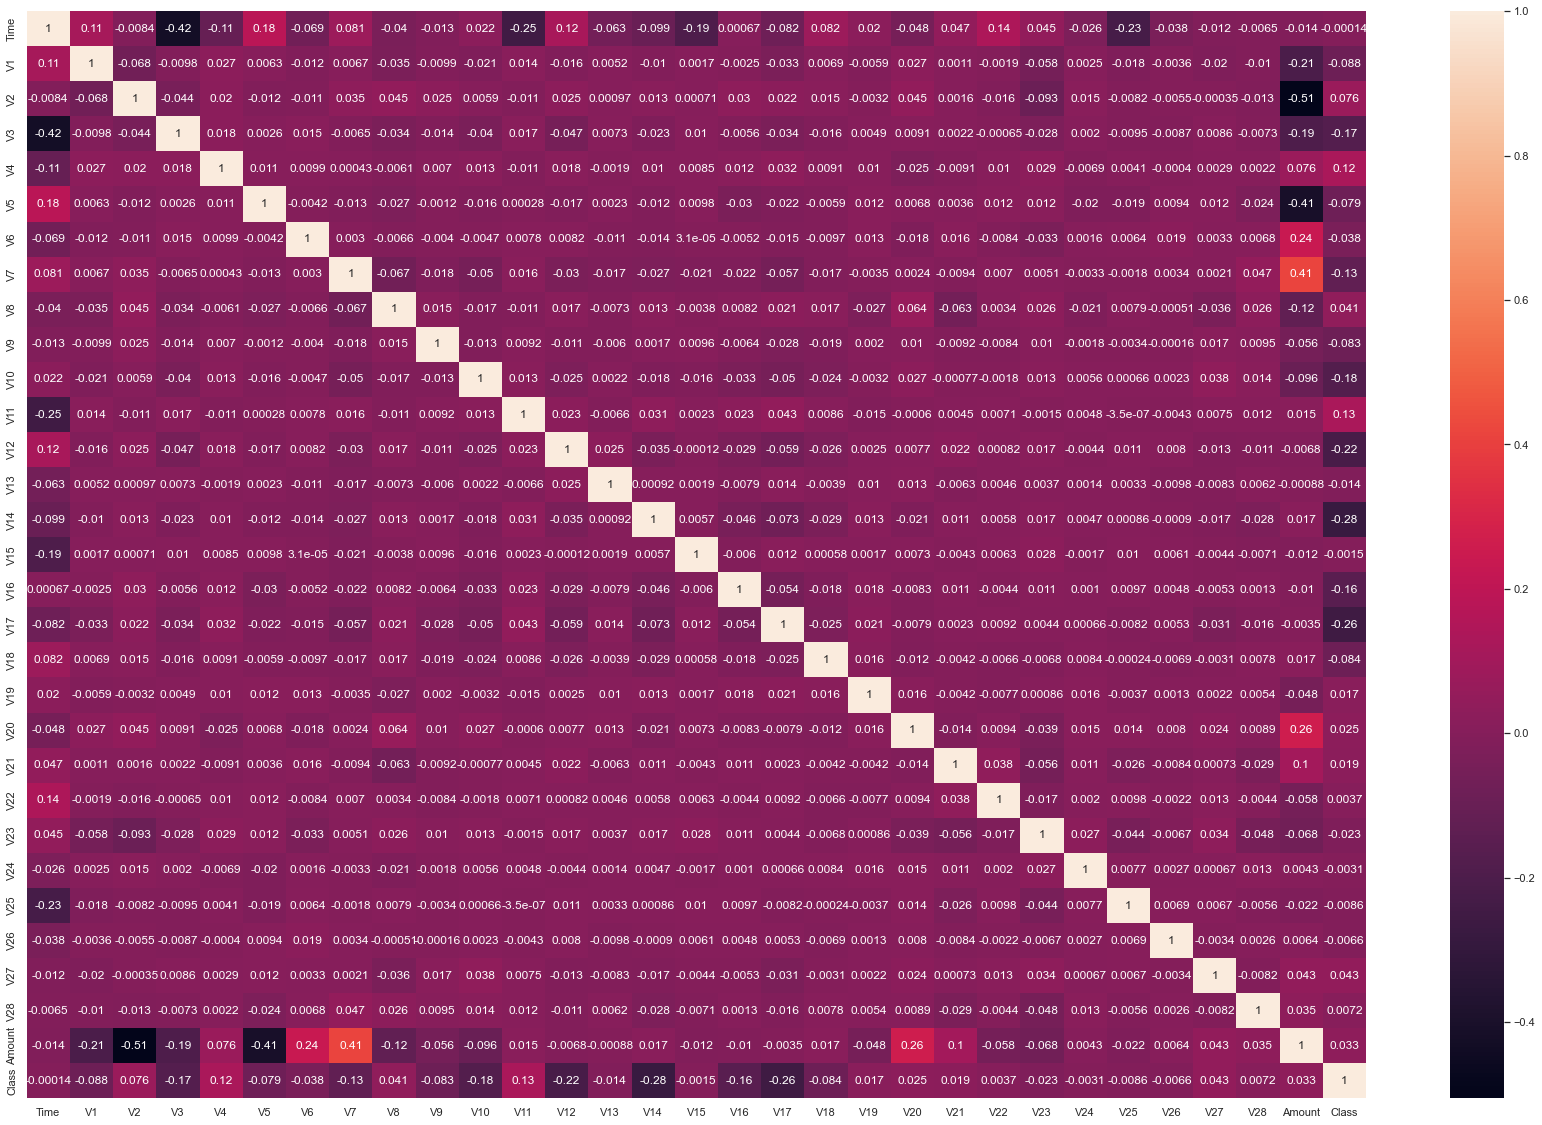

In [7]:
sns.set(rc={'figure.figsize':(30,20)})
sns.heatmap(df.corr(),annot=True)

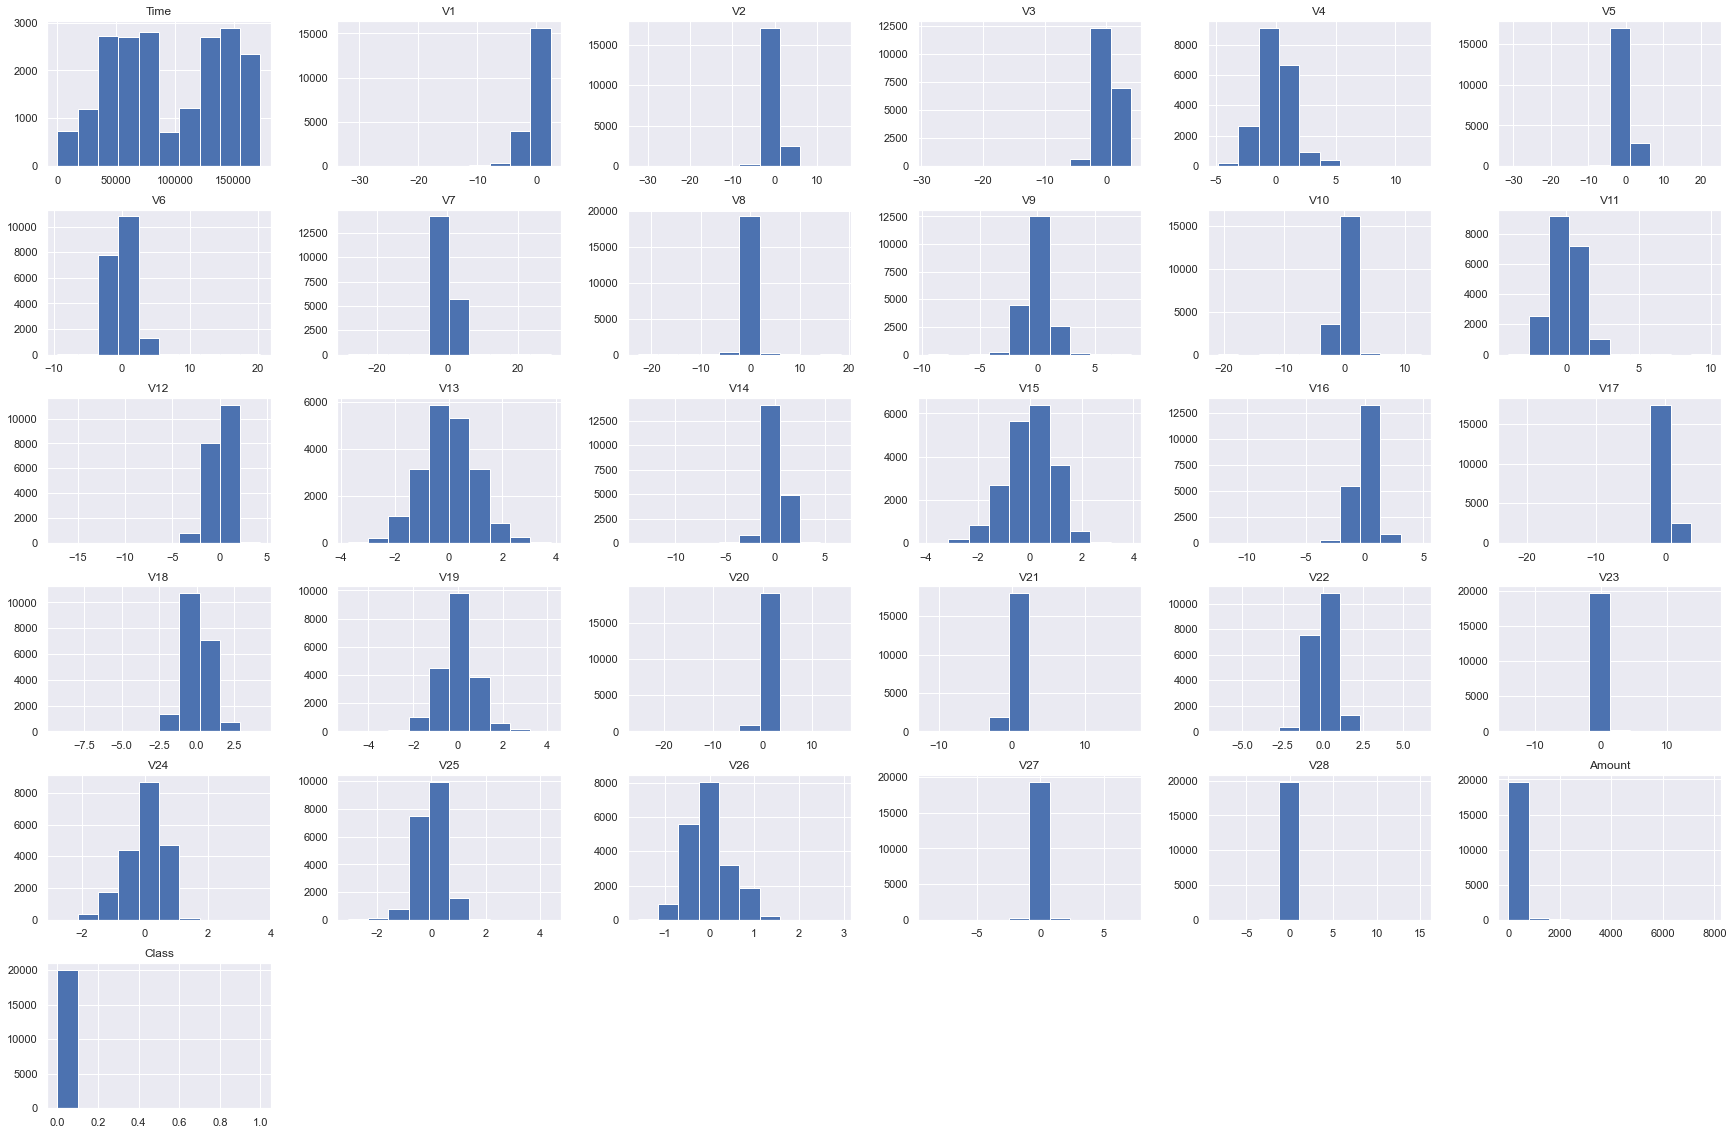

In [8]:
df.hist()
plt.show()

In [9]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,94905.121100,-0.022729,0.014248,0.010634,-0.008355,-0.002731,-0.003924,0.012147,0.000626,-0.011734,...,0.000755,0.005736,-0.000132,-0.006274,0.000711,-0.001426,0.004719,0.001685,89.069190,0.001950
std,47595.158327,1.931492,1.576517,1.506801,1.418816,1.386142,1.330692,1.201167,1.131891,1.091837,...,0.683011,0.720514,0.572915,0.605068,0.520926,0.479855,0.394854,0.323304,236.378495,0.044117
min,0.000000,-31.972536,-32.362448,-28.923756,-4.799866,-31.356750,-9.451264,-28.215112,-22.739755,-9.481456,...,-11.489450,-6.497616,-14.078082,-2.776600,-3.083184,-1.601742,-8.839766,-8.233983,0.000000,0.000000
25%,54200.750000,-0.922175,-0.596687,-0.886638,-0.865951,-0.691085,-0.776070,-0.549184,-0.213782,-0.646037,...,-0.228522,-0.541204,-0.162687,-0.361307,-0.317943,-0.325185,-0.071365,-0.053852,5.407500,0.000000
50%,84851.500000,-0.040454,0.073302,0.191096,-0.024216,-0.051932,-0.281009,0.048630,0.020285,-0.061976,...,-0.027748,0.014964,-0.014097,0.038691,0.022162,-0.054764,0.001947,0.011605,22.110000,0.000000
75%,139653.250000,1.300799,0.810080,1.029804,0.737109,0.612978,0.407126,0.574905,0.319272,0.577687,...,0.187756,0.528518,0.146728,0.433793,0.351166,0.240305,0.095073,0.079806,79.000000,0.000000
max,172771.000000,2.389259,15.598193,3.971381,12.132323,22.707762,20.379524,29.205868,18.329406,8.097440,...,16.283662,6.090514,16.722816,3.679740,4.381129,2.927144,7.126343,15.124103,7879.420000,1.000000


In [10]:
def getOutlierThresholds(col):
    Q3 = np.quantile(col, 0.75)
    Q1 = np.quantile(col, 0.25)
    IQR = Q3 - Q1
    lower_rng = Q1 - 1.5*IQR
    upper_rng = Q3 + 1.5*IQR
    outl_high = list(filter(lambda x: x > upper_rng, col))
    outl_low = list(filter(lambda x: x < lower_rng, col))
    return len(outl_high)/len(col), len(outl_low)/len(col)

In [11]:
thresholds = df.apply(getOutlierThresholds)
thresholds

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,0.000,0.01725,0.0001,0.03155,0.02900,0.07325,0.01520,0.04390,0.02145,...,0.02800,0.0014,0.03650,0.00025,0.00570,0.01660,0.069,0.0406,0.1106,0.00195
1,0.0,0.025,0.02920,0.0116,0.00770,0.01545,0.00675,0.01685,0.04425,0.00880,...,0.02315,0.0035,0.02885,0.01670,0.01375,0.00315,0.066,0.0629,0.0000,0.00000


In [12]:
from scipy.stats.mstats import winsorize
data_2 = df.copy()
for cl in df.columns:
    data_2[cl] = winsorize(df[cl], limits = [thresholds[cl][1], thresholds[cl][0]])

In [13]:
if data_2.shape==df.shape:
    print('no outliers')

no outliers


In [14]:
target=df.Class
df.drop(columns='Class',inplace=True)

In [15]:
# Perform SMOTE
smo = SMOTE()
df,target = smo.fit_resample(df,target)

In [16]:
# Perform undersampling
undersample = imblearn.under_sampling.RandomUnderSampler()
df,target = undersample.fit_resample(df,target)

In [17]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,142018.000000,-0.441698,1.070528,-0.252190,-0.756452,0.230775,-0.561947,0.527815,0.402767,-0.299160,...,-0.183530,-0.171686,-0.554804,0.095105,-0.419538,-0.497124,0.137819,-0.015626,0.015154,13.990000
1,166583.000000,-0.523559,1.362718,-0.360666,-0.554176,0.825165,-0.851513,0.836674,0.217789,-0.660828,...,-0.119861,-0.196828,-0.654582,0.069674,0.652815,-0.591273,0.083714,-0.001648,0.140619,8.980000
2,86691.000000,-0.123480,-0.682897,0.735626,-0.210681,1.127158,-0.507564,-0.396679,0.079649,1.030558,...,0.087655,-0.095690,-0.401419,0.311356,0.168590,-0.788318,-0.656278,-0.130203,-0.201502,1.180000
3,39632.000000,1.277614,-0.050241,0.124556,0.118730,-0.155314,-0.084027,-0.177664,0.061263,0.304515,...,-0.098935,-0.259287,-0.686230,-0.048703,-0.504743,0.394324,0.483180,-0.051502,-0.009545,4.000000
4,65732.000000,1.129680,-0.148107,0.665643,0.781061,-0.574404,0.055192,-0.376739,0.226150,0.487702,...,-0.218758,-0.008803,0.179993,-0.031835,0.271544,0.424293,0.441027,-0.008785,-0.003154,3.790000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39917,141896.149562,-3.241649,0.170574,-3.458872,4.212714,-0.502525,0.653769,-1.176638,0.823952,-2.170945,...,-0.104941,0.293966,0.065181,-0.310997,-0.635246,-0.422862,0.054040,0.219499,-0.729031,273.038086
39918,156496.991728,-1.029842,4.225403,-6.176125,6.688202,1.101252,-1.690594,-1.465126,0.763452,-3.713754,...,0.445219,0.298496,-0.305634,-0.156018,-1.070519,-0.065154,0.531573,-0.081146,0.250600,0.806370
39919,161514.442301,-0.569773,1.206638,-5.430506,6.494474,1.729559,-3.002797,-3.323294,0.551965,-3.099111,...,0.903336,0.662011,-0.322924,0.254428,-0.309861,0.189891,0.180525,0.753759,0.493362,3.847935
39920,90898.322991,-5.472980,4.252102,-6.792631,7.020519,-5.856391,-1.406122,-8.275733,1.965916,-3.844797,...,0.182587,1.314065,0.194855,0.188304,0.627925,-0.592104,-0.183370,0.921306,0.118935,138.853270


# PCA on SMOTE + Undersample dataset

In [18]:
df_norm=scale(df)
df_norm

array([[ 0.96146766,  0.32808273, -0.09180685, ..., -0.36772683,
        -0.02714064, -0.52304808],
       [ 1.46083949,  0.31015752,  0.0030465 , ..., -0.34639602,
         0.32814483, -0.53960536],
       [-0.16325229,  0.39776335, -0.66101789, ..., -0.54257114,
        -0.64065691, -0.56538315],
       ...,
       [ 1.35780285,  0.30003798, -0.04762143, ...,  0.80635685,
         1.32702507, -0.55656604],
       [-0.07772334, -0.7736238 ,  0.94102217, ...,  1.06203371,
         0.26673874, -0.11039428],
       [-0.29928162,  0.51821112, -0.18245685, ..., -0.43296515,
        -1.02698009,  0.21642914]])

In [19]:
pca=PCA(n_components=30)
pca_values=pca.fit_transform(df_norm)

In [20]:
# The amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_
var

array([3.52761363e-01, 9.25067599e-02, 7.90467761e-02, 7.11584001e-02,
       4.68398838e-02, 4.04693493e-02, 3.67896817e-02, 3.20069399e-02,
       2.91441626e-02, 2.79180803e-02, 2.47510113e-02, 2.27878772e-02,
       2.03942649e-02, 1.87555337e-02, 1.82292238e-02, 1.37664762e-02,
       1.25027954e-02, 1.15294048e-02, 9.89698297e-03, 7.90363556e-03,
       5.84475656e-03, 5.05520248e-03, 3.96886835e-03, 3.52990243e-03,
       3.42050905e-03, 2.79608588e-03, 2.53627237e-03, 2.08788780e-03,
       1.29706116e-03, 3.04851492e-04])

In [21]:
pca.components_
pca.components_[0]

array([-0.05463071, -0.25062011,  0.24139945, -0.2803083 ,  0.23461806,
       -0.23704986, -0.15395622, -0.26108033,  0.1710447 , -0.23148542,
       -0.27070143,  0.25162619, -0.26737874, -0.01675889, -0.22646633,
       -0.02194727, -0.2650081 , -0.27261877, -0.23875656,  0.10343759,
        0.11616503,  0.0673423 , -0.02969648, -0.05525392,  0.00079388,
        0.05055876, -0.02324961,  0.09795233,  0.05165496,  0.04121179])

In [22]:
# Cumulative variance 
var1 = np.cumsum(np.round(var, decimals = 4) * 100)
var1

array([ 35.28,  44.53,  52.43,  59.55,  64.23,  68.28,  71.96,  75.16,
        78.07,  80.86,  83.34,  85.62,  87.66,  89.54,  91.36,  92.74,
        93.99,  95.14,  96.13,  96.92,  97.5 ,  98.01,  98.41,  98.76,
        99.1 ,  99.38,  99.63,  99.84,  99.97, 100.  ])

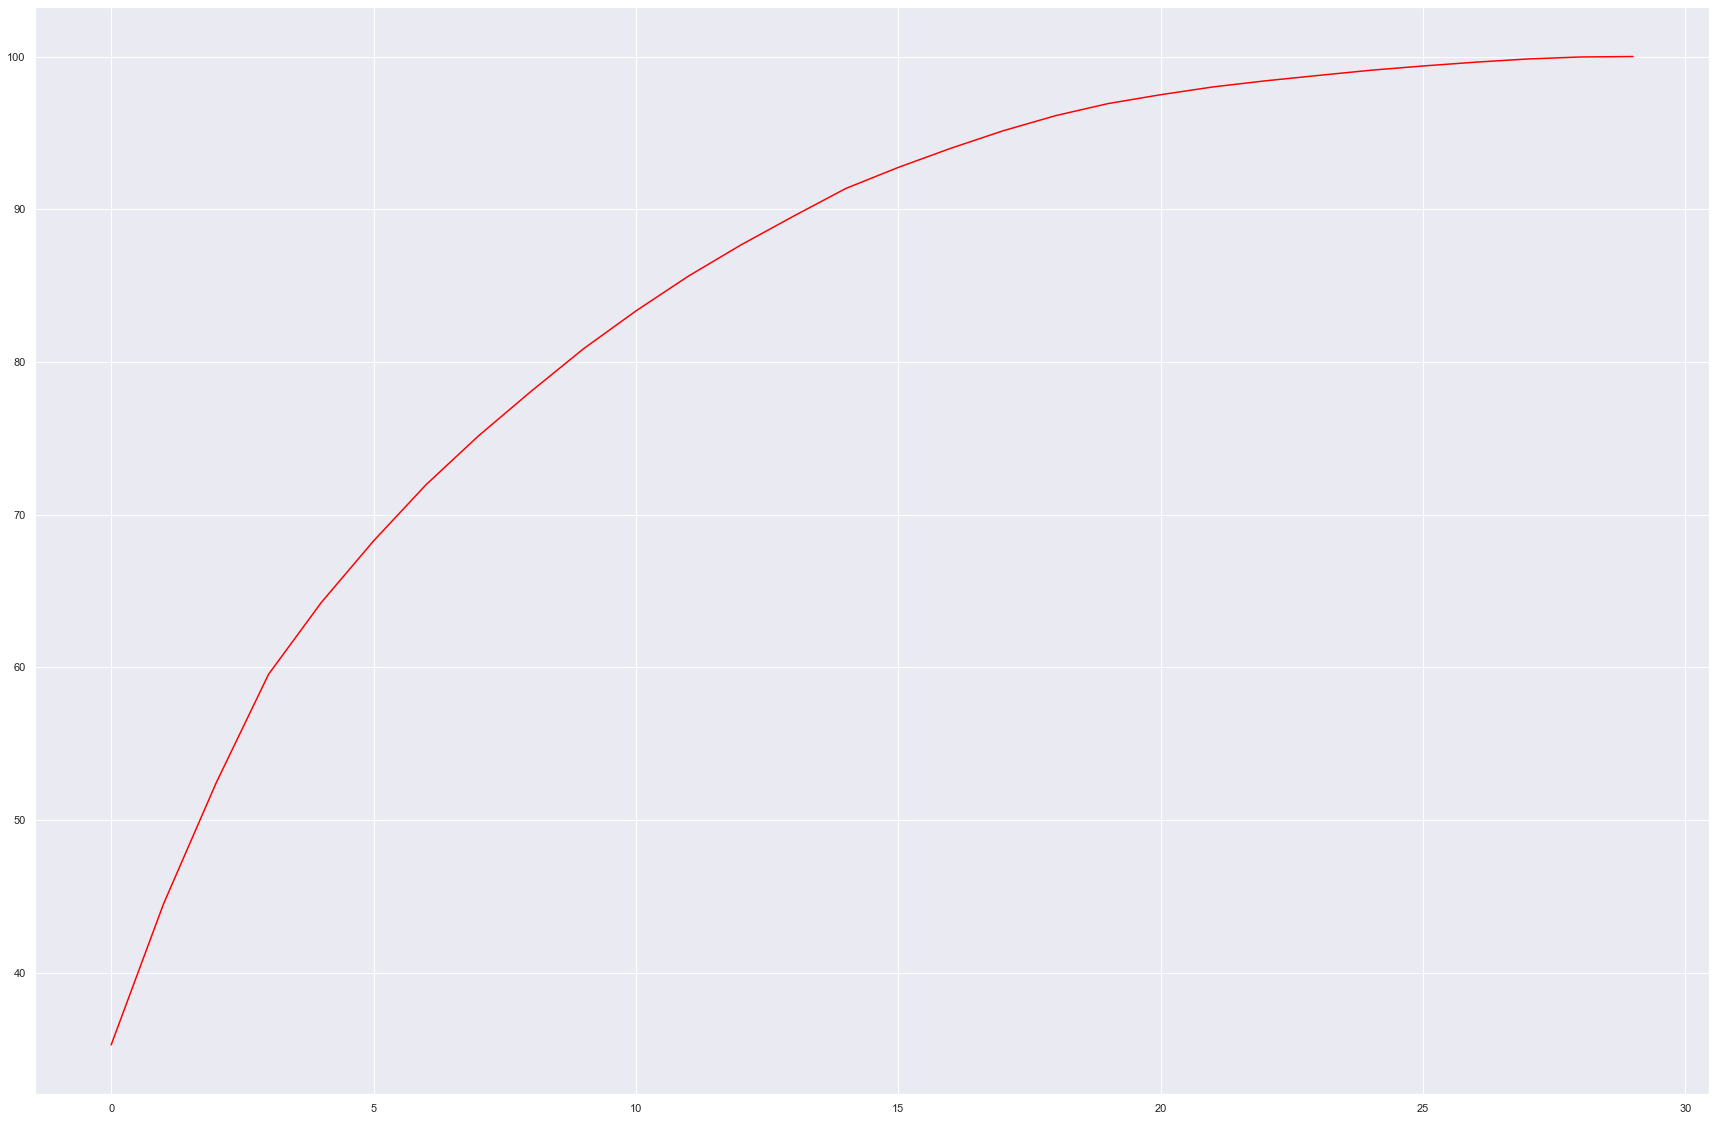

In [23]:
# Variance plot for PCA components obtained 
plt.plot(var1, color = "red")

In [24]:
df_norm=pd.DataFrame(df_norm)
target=pd.DataFrame(target)

In [25]:
df_norm.columns=columns
df_norm

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.961468,0.328083,-0.091807,0.533640,-1.068993,0.404148,0.004427,0.560632,-0.087261,0.444598,...,-0.445833,-0.378982,-0.749319,0.306035,-0.687681,-0.723249,0.452572,-0.367727,-0.027141,-0.523048
1,1.460839,0.310158,0.003046,0.511867,-0.989365,0.566832,-0.180146,0.640159,-0.149286,0.213411,...,-0.366483,-0.404996,-0.882612,0.278724,1.280137,-0.872593,0.313144,-0.346396,0.328145,-0.539605
2,-0.163252,0.397763,-0.661018,0.731913,-0.854144,0.649487,0.039091,0.322589,-0.195605,1.294586,...,-0.107861,-0.300347,-0.544414,0.538274,0.391560,-1.185155,-1.593836,-0.542571,-0.640657,-0.565383
3,-1.119895,0.704563,-0.455640,0.609260,-0.724467,0.298476,0.309059,0.378982,-0.201770,0.830481,...,-0.340403,-0.469624,-0.924889,0.151595,-0.844035,0.690811,1.342579,-0.422473,-0.097083,-0.556063
4,-0.589319,0.672169,-0.487410,0.717866,-0.463732,0.183771,0.397799,0.327724,-0.146482,0.947579,...,-0.489735,-0.210442,0.232291,0.169710,0.580486,0.738350,1.233949,-0.357288,-0.078987,-0.556758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39917,0.958991,-0.285026,-0.383957,-0.109999,0.887182,0.203444,0.779339,0.121762,0.053964,-0.751893,...,-0.347888,0.102839,0.078914,-0.130090,-1.083514,-0.605450,0.236671,-0.008926,-2.134488,0.333066
39918,1.255805,0.199296,0.932355,-0.655401,1.861689,0.642397,-0.714986,0.047481,0.033678,-1.738094,...,0.337763,0.107527,-0.416454,0.036347,-1.882260,-0.038036,1.467288,-0.467711,0.639584,-0.566618
39919,1.357803,0.300038,-0.047621,-0.505742,1.785426,0.814364,-1.551399,-0.430969,-0.037235,-1.345200,...,0.908703,0.483664,-0.439552,0.477137,-0.486419,0.366529,0.562627,0.806357,1.327025,-0.556566
39920,-0.077723,-0.773624,0.941022,-0.779145,1.992510,-1.261904,-0.533660,-1.706147,0.436871,-1.821861,...,0.010451,1.158359,0.252145,0.406125,1.234461,-0.873910,-0.375140,1.062034,0.266739,-0.110394


In [26]:
bestfeatures=SelectKBest(score_func=chi2,k=28)

In [27]:
x_abs=df_norm.abs()

In [28]:
fit=bestfeatures.fit(x_abs,target)
ccscores=pd.DataFrame(fit.scores_)
cccolumns=pd.DataFrame(x_abs.columns)

featureScore=pd.concat([cccolumns,ccscores],axis=1)
featureScore.columns=['Features','Score']
featureScore.nlargest(28,'Score')

best_col=featureScore.nlargest(28,'Score').Features
best_col

8         V8
28       V28
23       V23
5         V5
27       V27
21       V21
7         V7
26       V26
18       V18
17       V17
2         V2
6         V6
29    Amount
16       V16
19       V19
25       V25
1         V1
24       V24
20       V20
15       V15
13       V13
3         V3
12       V12
10       V10
11       V11
14       V14
0       Time
22       V22
Name: Features, dtype: object

In [29]:
fscols=[]
for i in best_col:
    fscols.append(i)
fselected=df_norm[fscols]
fselected.shape

(39922, 28)

In [30]:
fselected

,V8,V28,V23,V5,V27,V21,V7,V26,V18,V17,...,V20,V15,V13,V3,V12,V10,V11,V14,Time,V22
0,-0.087261,-0.027141,0.306035,0.404148,-0.367727,-0.378982,0.560632,0.452572,0.384531,0.443753,...,-0.445833,-1.199631,-0.416306,0.533640,0.936995,0.598593,-0.590616,1.040968,0.961468,-0.749319
1,-0.149286,0.328145,0.278724,0.566832,-0.346396,-0.404996,0.640159,0.313144,0.353979,0.740975,...,-0.366483,-0.462185,1.044177,0.511867,0.860917,0.230181,-1.110567,0.600457,1.460839,-0.882612
2,-0.195605,-0.640657,0.538274,0.649487,-0.542571,-0.300347,0.322589,-1.593836,0.686105,0.387850,...,-0.107861,1.340365,-1.412572,0.731913,0.456409,0.630268,-1.492053,0.859690,-0.163252,-0.544414
3,-0.201770,-0.097083,0.151595,0.298476,-0.422473,-0.469624,0.378982,1.342579,0.553848,0.422233,...,-0.340403,-0.357435,-0.336007,0.609260,0.918075,0.702711,-0.558275,0.929003,-1.119895,-0.924889
4,-0.146482,-0.078987,0.169710,0.183771,-0.357288,-0.210442,0.327724,1.233949,0.186156,0.644730,...,-0.489735,-0.915172,-1.134049,0.717866,1.004429,0.698923,-0.143374,0.911802,-0.589319,0.232291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39917,0.053964,-2.134488,-0.130090,0.203444,-0.008926,0.102839,0.121762,0.236671,-0.305710,-0.496183,...,-0.347888,0.206914,-0.386046,-0.109999,-0.408051,-0.068900,0.612926,-0.445180,0.958991,0.078914
39918,0.033678,0.639584,0.036347,0.642397,-0.467711,0.107527,0.047481,1.467288,1.419357,0.662138,...,0.337763,0.798792,-0.427916,-0.655401,-0.943365,-0.534550,1.565357,-2.203612,1.255805,-0.416454
39919,-0.037235,1.327025,0.477137,0.814364,0.806357,0.483664,-0.430969,0.562627,-0.432196,-0.647195,...,0.908703,-0.733202,-0.201942,-0.505742,-1.127744,-0.603707,0.665798,-1.710135,1.357803,-0.439552
39920,0.436871,0.266739,0.406125,-1.261904,1.062034,1.158359,-1.706147,-0.375140,-3.582906,-3.616523,...,0.010451,-1.646822,0.352489,-0.779145,-3.140520,-2.226771,2.046625,-1.767793,-0.077723,0.252145


In [31]:
pca=PCA(n_components=28)
pca_values_fs=pca.fit_transform(fselected)

In [32]:
# The amount of variance that each PCA explains is 
varfs = pca.explained_variance_ratio_
varfs

array([0.33957381, 0.09466004, 0.08218923, 0.07467139, 0.04855474,
       0.04320707, 0.0381641 , 0.03423885, 0.03105208, 0.02913766,
       0.02621969, 0.02276567, 0.0218466 , 0.01987835, 0.01950837,
       0.01467536, 0.01290917, 0.01207946, 0.0066595 , 0.00553106,
       0.00445036, 0.00426046, 0.00377721, 0.00301402, 0.00287974,
       0.00226893, 0.00143021, 0.00039686])

In [33]:
pca.components_
pca.components_[0]

array([ 0.19135115,  0.053837  , -0.06232564, -0.26081916,  0.10998873,
        0.07635264, -0.27760451, -0.02780853, -0.25705326, -0.28910666,
        0.25643508, -0.15920094,  0.04426873, -0.27967923,  0.11385784,
        0.05991133, -0.27075568,  0.00552487,  0.12121688, -0.01872098,
       -0.00806783, -0.29641152, -0.27515866, -0.28172604,  0.25853939,
       -0.22578989, -0.06912859, -0.03635834])

In [34]:
# Cumulative variance 
var1fs = np.cumsum(np.round(varfs, decimals = 4) * 100)
var1fs

array([ 33.96,  43.43,  51.65,  59.12,  63.98,  68.3 ,  72.12,  75.54,
        78.65,  81.56,  84.18,  86.46,  88.64,  90.63,  92.58,  94.05,
        95.34,  96.55,  97.22,  97.77,  98.22,  98.65,  99.03,  99.33,
        99.62,  99.85,  99.99, 100.03])

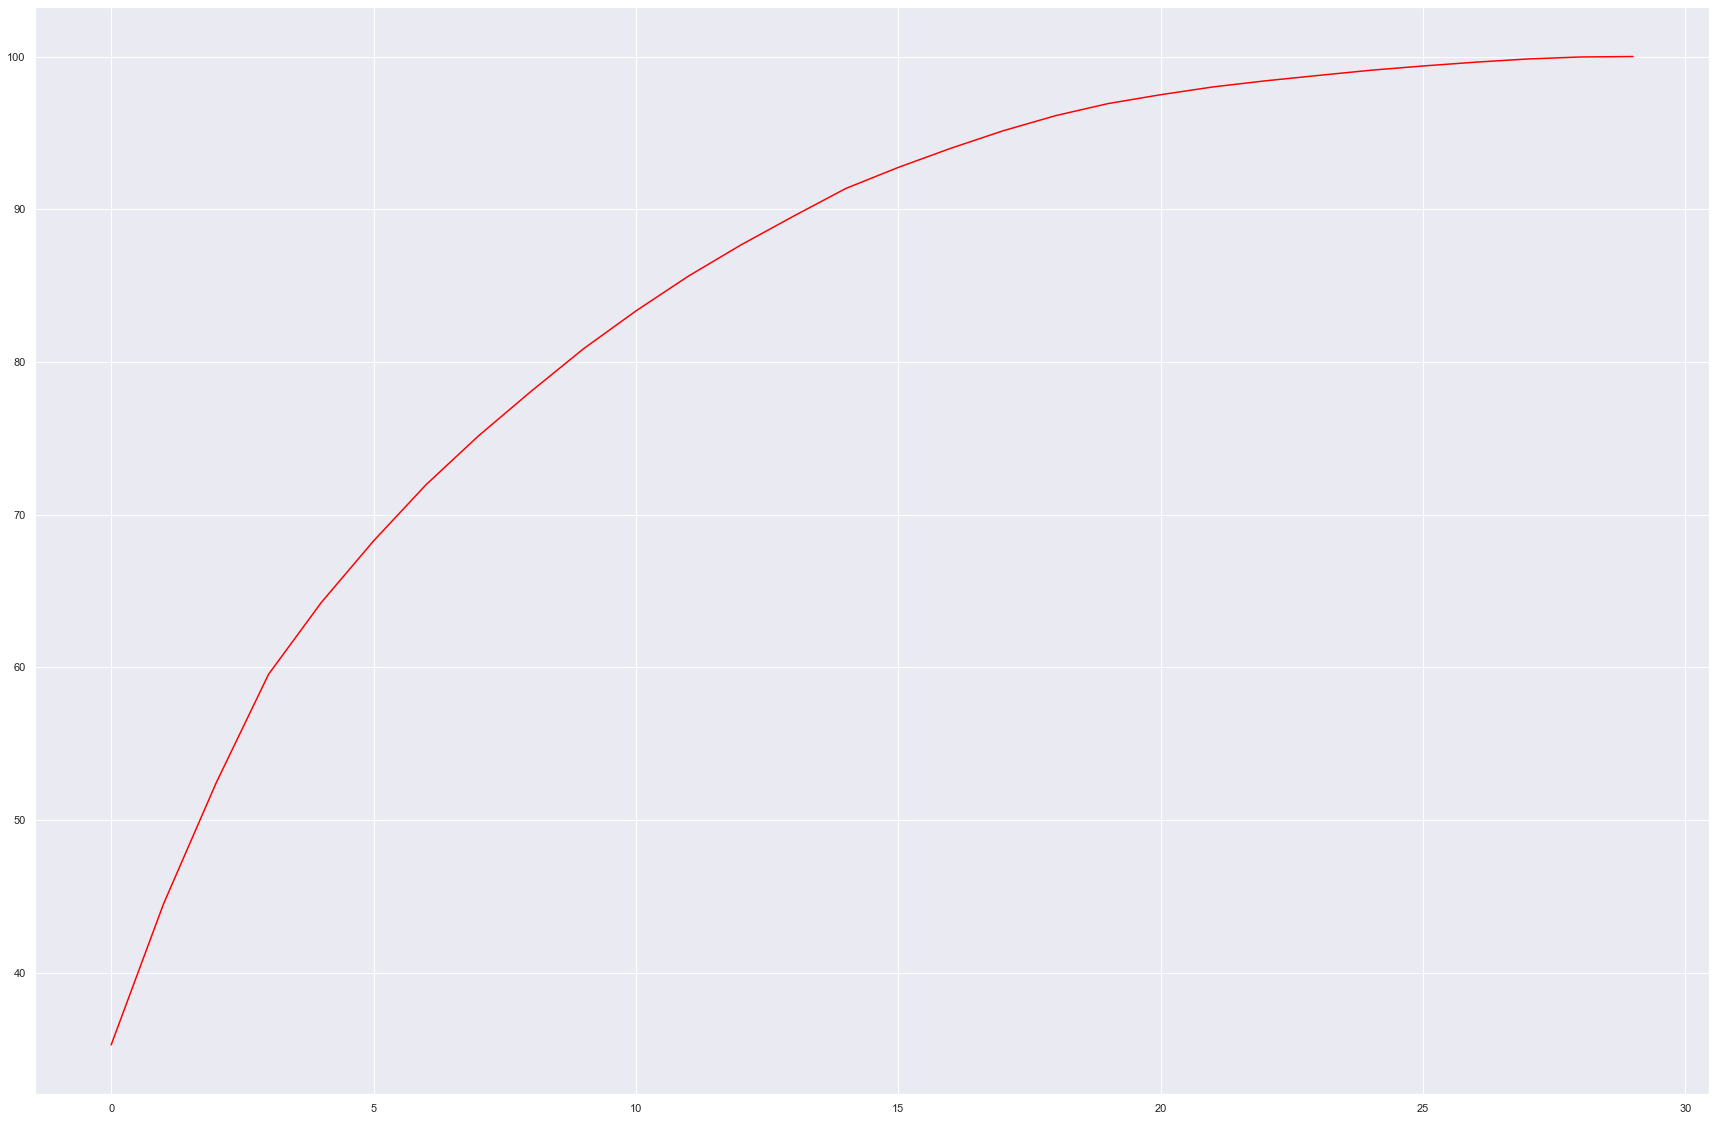

In [35]:
# Variance plot for PCA components obtained 
plt.plot(var1, color = "red")

In [36]:
x_train,x_test,y_train,y_test=train_test_split(pca_values_fs,target,test_size=0.3,
                                              random_state=0,
                                              stratify=target)

In [37]:
lr=LogisticRegression(random_state=14).fit(x_train, y_train)

C:\Users\toanb\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\toanb\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
y_pred=lr.predict(x_test)

In [39]:
accuracy_score(y_test,y_pred)

0.9921516239458963

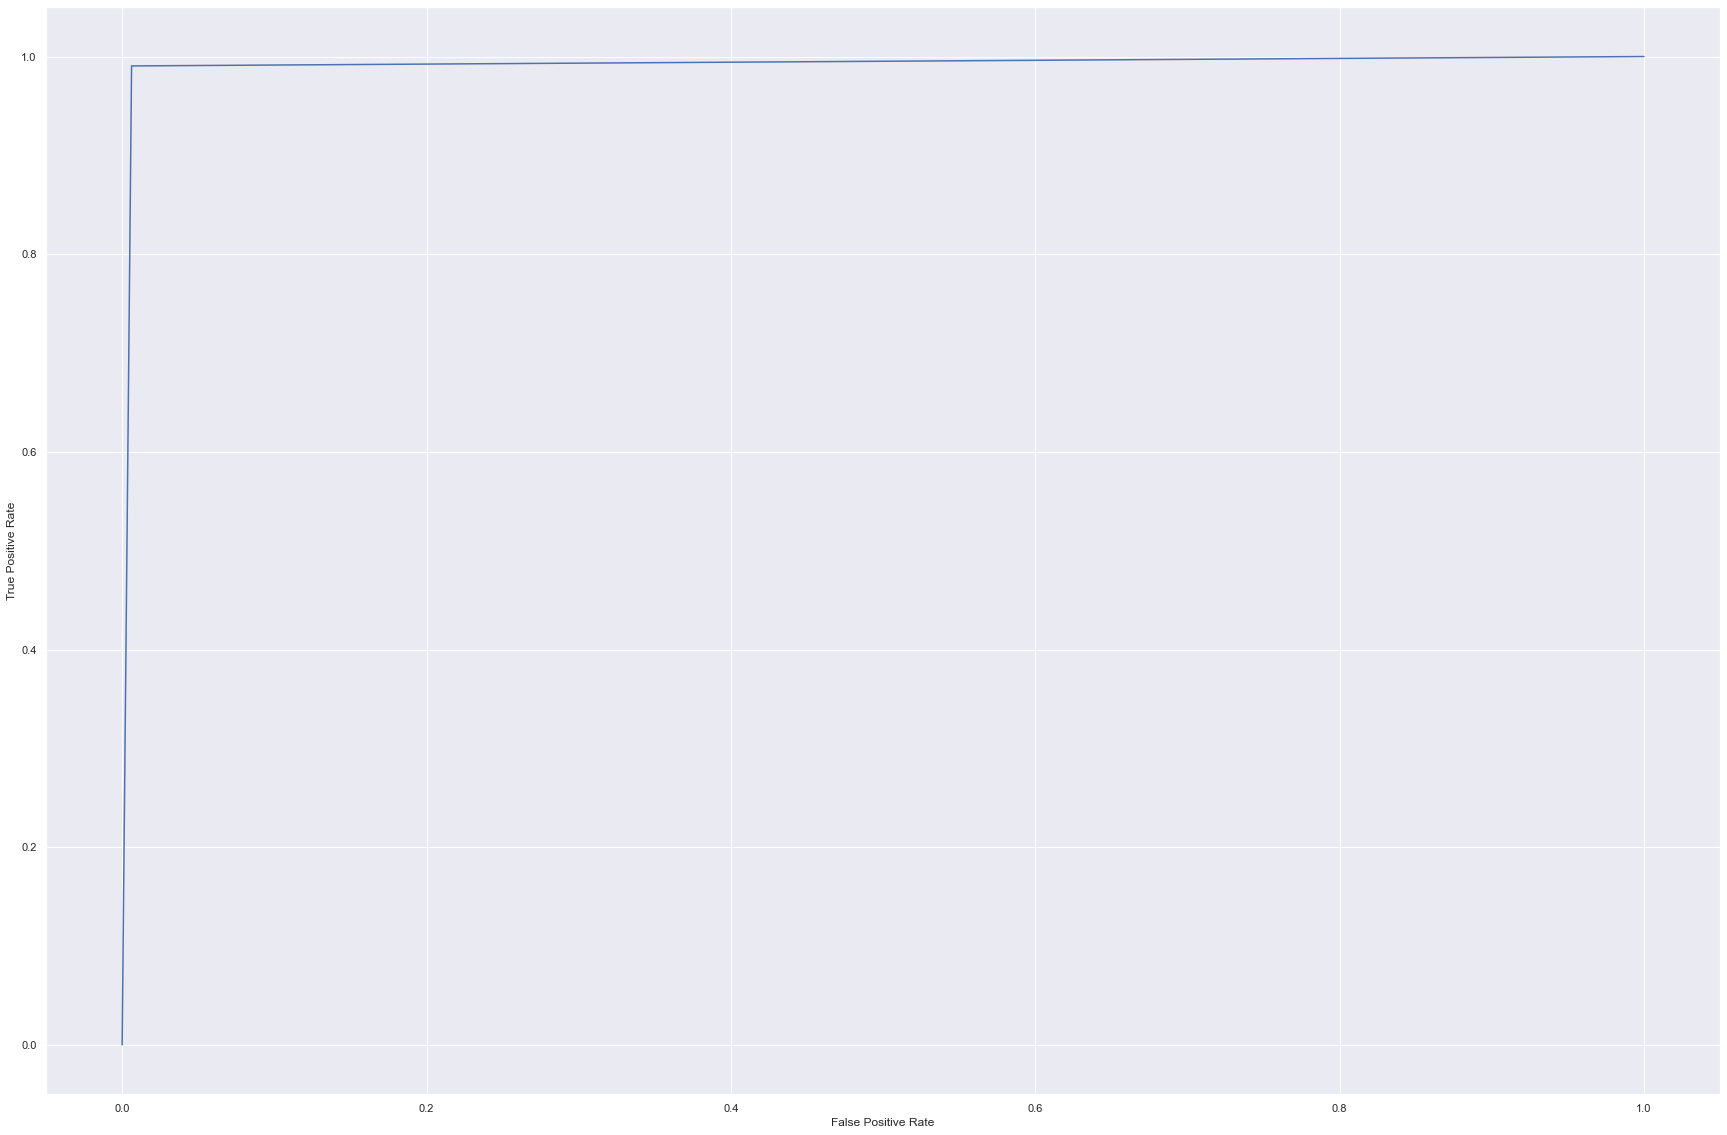

In [40]:
y_pred_proba = lr.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [41]:
confusion_matrx = pd.crosstab(y_pred, y_test.Class)
confusion_matrx

Class,0,1
row_0,,
0,5952,57
1,37,5931


In [42]:
# Simple logistic regression
classification_test_lr = classification_report(y_pred, y_test.Class)
print(classification_test_lr)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6009
           1       0.99      0.99      0.99      5968

    accuracy                           0.99     11977
   macro avg       0.99      0.99      0.99     11977
weighted avg       0.99      0.99      0.99     11977



In [43]:
# creating empty list variable 
acc = []

best=100
best_k=0
for i in range(3,25,2):
    neigh = KNeighborsClassifier(n_neighbors=i,n_jobs=-1)
    neigh.fit(x_train, y_train)
    train_acc = np.mean(neigh.predict(x_train) == y_train.Class)
    test_acc = np.mean(neigh.predict(x_test) == y_test.Class)
    acc.append([train_acc, test_acc])
    if abs(train_acc-test_acc)<best:
        best=abs(train_acc-test_acc)
        best_k=i

C:\Users\toanb\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\toanb\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\toanb\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\toanb\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

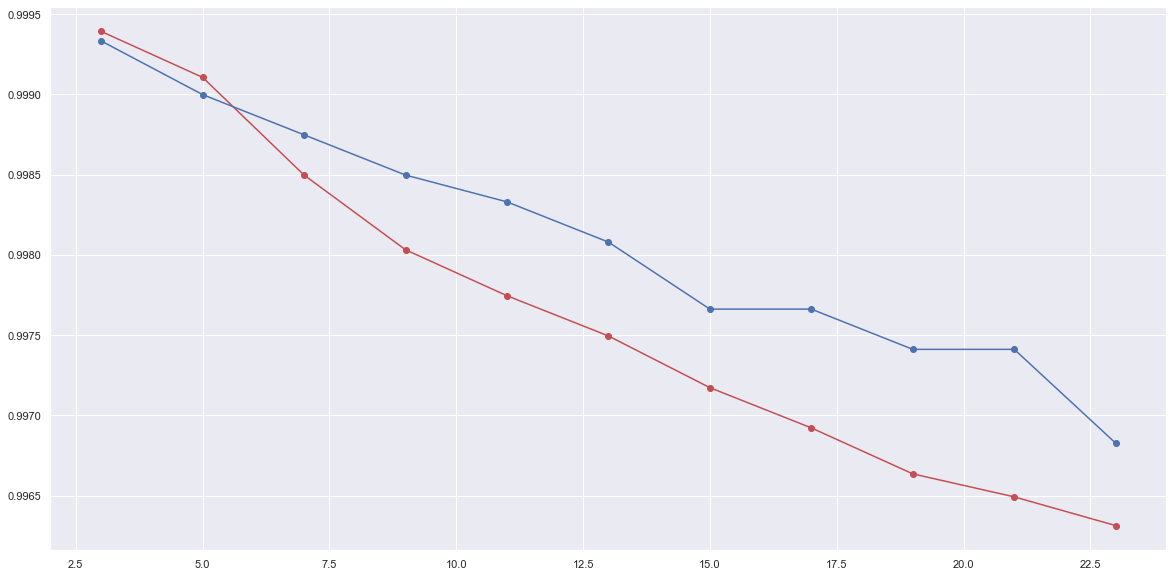

In [44]:
# train accuracy plot 
plt.figure(figsize=(20,10))
plt.plot(np.arange(3,25,2),[i[0] for i in acc],"ro-")
# test accuracy plot
plt.plot(np.arange(3,25,2),[i[1] for i in acc],"bo-")

In [45]:
knn_best = KNeighborsClassifier(n_neighbors = best_k)
knn_best.fit(x_train,y_train)

pred_bestk = knn_best.predict(x_test)
pred_bestk

C:\Users\toanb\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


array([1, 0, 0, ..., 1, 0, 1], dtype=int64)

In [46]:
classification_test_knn = classification_report(pred_bestk, y_test.Class)
print(classification_test_knn)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5981
           1       1.00      1.00      1.00      5996

    accuracy                           1.00     11977
   macro avg       1.00      1.00      1.00     11977
weighted avg       1.00      1.00      1.00     11977



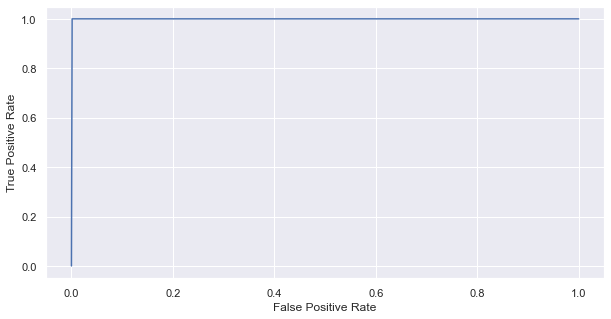

In [47]:
y_pred_proba_knn = knn_best.predict_proba(x_test)[::,1]
fpr_knn, tpr_knn, _ = metrics.roc_curve(y_test,  pred_bestk)

#create ROC curve
plt.figure(figsize=(10,5))
plt.plot(fpr_knn,tpr_knn)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [48]:
columns_fs=''
for i in fselected.columns:
    columns_fs=columns_fs+i+'+'
columns_fs

'V8+V28+V23+V5+V27+V21+V7+V26+V18+V17+V2+V6+Amount+V16+V19+V25+V1+V24+V20+V15+V13+V3+V12+V10+V11+V14+Time+V22+'

In [49]:
data=fselected
data['Class']=target

C:\Users\toanb\AppData\Local\Temp\ipykernel_19820\2161366427.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Class']=target


In [51]:
logit_model = sm.logit('Class ~ V8+V28+V23+V5+V27+V21+V7+V26+V18+V17+V2+V6+Amount+V16+V19+V25+V1+V24+V20+V15+V13+V3+V12+V10+V11+V14+Time+V22', data = fselected).fit()

Optimization terminated successfully.
         Current function value: 0.022036
         Iterations 15


In [52]:
pred = logit_model.predict(data.iloc[ :, : -1])

In [53]:
fpr, tpr, thresholds = roc_curve(data.Class, pred)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.3407675781107078

In [54]:
train_data, test_data = train_test_split(data,test_size = 0.3) # 30% test data

In [56]:
logit_model = sm.logit('Class ~ V8+V28+V23+V5+V27+V21+V7+V26+V18+V17+V2+V6+Amount+V16+V19+V25+V1+V24+V20+V15+V13+V3+V12+V10+V11+V14+Time+V22', data = train_data).fit()

Optimization terminated successfully.
         Current function value: 0.016191
         Iterations 17


In [57]:
logit_model.summary2() # for AIC


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
================================================================
Model:              Logit            Pseudo R-squared: 0.977    
Dependent Variable: Class            AIC:              962.9002 
Date:               2022-09-08 03:24 BIC:              1201.8020
No. Observations:   27945            Log-Likelihood:   -452.45  
Df Model:           28               LL-Null:          -19370.  
Df Residuals:       27916            LLR p-value:      0.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     17.0000                                     
----------------------------------------------------------------
              Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
----------------------------------------------------------------
Intercept     32.8337   2.5974  12.6412 0.0000  27.7429  37.9244
V8            24.0789   3.1226   7.7111 0.0000  17.9587  30.1992
V28            1.4059   0.2811   5.0011 0.0000   0.8549   1.9569
V23            8.0671   0.7767  10.3860 0.0000   6.5447   9.5895
V5            35.0078   3.1367  11.1609 0.0000  28.8601  41.1556
V27           -1.7553   0.4629  -3.7918 0.0001  -2.6626  -0.8480
V21           -2.8900   1.5696  -1.8412 0.0656  -5.9664   0.1864
V7           -18.7163   2.0365  -9.1904 0.0000 -22.7078 -14.7249
V26           -0.7046   0.1995  -3.5315 0.0004  -1.0956  -0.3135
V18           -8.2891   1.0370  -7.9936 0.0000 -10.3216  -6.2567
V17          -25.5089   2.9929  -8.5232 0.0000 -31.3748 -19.6429
V2            30.9459   3.2849   9.4206 0.0000  24.5075  37.3842
V6            -9.8333   0.8969 -10.9640 0.0000 -11.5911  -8.0754
Amount        31.9041   2.9021  10.9934 0.0000  26.2160  37.5921
V16           -9.2422   1.2281  -7.5255 0.0000 -11.6493  -6.8351
V19            3.0025   0.3845   7.8094 0.0000   2.2489   3.7560
V25            1.8002   0.2454   7.3369 0.0000   1.3193   2.2812
V1            33.1243   2.8435  11.6490 0.0000  27.5511  38.6975
V24            0.2152   0.1307   1.6458 0.0998  -0.0411   0.4714
V20           -6.6532   0.5538 -12.0136 0.0000  -7.7387  -5.5678
V15            0.7881   0.3119   2.5266 0.0115   0.1768   1.3995
V13           -2.3269   0.7076  -3.2886 0.0010  -3.7138  -0.9401
V3            24.8037   2.2606  10.9722 0.0000  20.3730  29.2344
V12           -3.7905   3.4015  -1.1143 0.2651 -10.4574   2.8764
V10           -4.1227   0.8046  -5.1239 0.0000  -5.6997  -2.5457
V11            0.6028   0.6262   0.9627 0.3357  -0.6245   1.8302
V14          -26.2077   2.7407  -9.5625 0.0000 -31.5793 -20.8361
Time          -1.1736   0.1904  -6.1638 0.0000  -1.5467  -0.8004
V22            2.8141   0.5723   4.9176 0.0000   1.6925   3.9357
================================================================

"""

In [58]:
logit_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:                27945
Model:                          Logit   Df Residuals:                    27916
Method:                           MLE   Df Model:                           28
Date:                Thu, 08 Sep 2022   Pseudo R-squ.:                  0.9766
Time:                        03:25:00   Log-Likelihood:                -452.45
converged:                       True   LL-Null:                       -19370.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     32.8337      2.597     12.641      0.000      27.743      37.924
V8            24.0789      3.123      7.711      0.000      17.959      30.199
V28            1.4059      0.281      5.001      0.000       0.855       1.957
V23            8.0671      0.777     10.386      0.000       6.545       9.589
V5            35.0078      3.137     11.161      0.000      28.860      41.156
V27           -1.7553      0.463     -3.792      0.000      -2.663      -0.848
V21           -2.8900      1.570     -1.841      0.066      -5.966       0.186
V7           -18.7163      2.036     -9.190      0.000     -22.708     -14.725
V26           -0.7046      0.200     -3.532      0.000      -1.096      -0.314
V18           -8.2891      1.037     -7.994      0.000     -10.322      -6.257
V17          -25.5089      2.993     -8.523      0.000     -31.375     -19.643
V2            30.9459      3.285      9.421      0.000      24.508      37.384
V6            -9.8333      0.897    -10.964      0.000     -11.591      -8.075
Amount        31.9041      2.902     10.993      0.000      26.216      37.592
V16           -9.2422      1.228     -7.525      0.000     -11.649      -6.835
V19            3.0025      0.384      7.809      0.000       2.249       3.756
V25            1.8002      0.245      7.337      0.000       1.319       2.281
V1            33.1243      2.844     11.649      0.000      27.551      38.697
V24            0.2152      0.131      1.646      0.100      -0.041       0.471
V20           -6.6532      0.554    -12.014      0.000      -7.739      -5.568
V15            0.7881      0.312      2.527      0.012       0.177       1.400
V13           -2.3269      0.708     -3.289      0.001      -3.714      -0.940
V3            24.8037      2.261     10.972      0.000      20.373      29.234
V12           -3.7905      3.402     -1.114      0.265     -10.457       2.876
V10           -4.1227      0.805     -5.124      0.000      -5.700      -2.546
V11            0.6028      0.626      0.963      0.336      -0.624       1.830
V14          -26.2077      2.741     -9.563      0.000     -31.579     -20.836
Time          -1.1736      0.190     -6.164      0.000      -1.547      -0.800
V22            2.8141      0.572      4.918      0.000       1.693       3.936
==============================================================================

Possibly complete quasi-separation: A fraction 0.80 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [59]:
test_pred = logit_model.predict(test_data)

In [60]:
test_data.shape

(11977, 29)

In [62]:
test_data["test_pred"] = np.zeros(11977)

In [63]:
test_data.loc[test_pred > optimal_threshold, "test_pred"] = 1

In [64]:
# confusion matrix 
confusion_matrix = pd.crosstab(test_data.test_pred, test_data['Class'])
confusion_matrix

Class,0,1
test_pred,,
0.0,5948,14
1.0,48,5967


In [65]:
accuracy_test = (5991+5956)/(5991+5956+7+21)
accuracy_test

0.9976617954070981

In [66]:
classification_test_logit = classification_report(test_data["test_pred"], test_data["Class"])
print(classification_test_logit)

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      5962
         1.0       1.00      0.99      0.99      6015

    accuracy                           0.99     11977
   macro avg       0.99      0.99      0.99     11977
weighted avg       0.99      0.99      0.99     11977



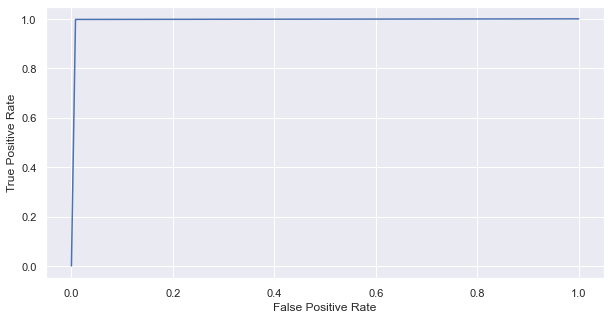

In [67]:
fpr_logit, tpr_logit, _ = metrics.roc_curve(test_data["Class"],  test_data["test_pred"])

#create ROC curve
plt.figure(figsize=(10,5))
plt.plot(fpr_logit,tpr_logit)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [68]:
model_linear = SVC(kernel = "linear")
model_linear.fit(x_train, y_train)
pred_test_linear = model_linear.predict(x_test)
np.mean(pred_test_linear == y_test.Class)

C:\Users\toanb\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.993904984553728

In [69]:
# kernel = rbf
model_rbf = SVC(kernel = "rbf")
model_rbf.fit(x_train, y_train)
pred_test_rbf = model_rbf.predict(x_test)

np.mean(pred_test_rbf==y_test.Class)

C:\Users\toanb\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9997495199131669

In [70]:
# kernel =POLY
model_poly = SVC(kernel = "poly")
model_poly.fit(x_train, y_train)
pred_test_poly = model_poly.predict(x_test)

np.mean(pred_test_poly==y_test.Class)

C:\Users\toanb\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9990815730149453

In [71]:
# kernel =sigmoid
model_sig = SVC(kernel = "sigmoid")
model_sig.fit(x_train, y_train)
pred_test_sig = model_sig.predict(x_test)

np.mean(pred_test_sig==y_test.Class)

C:\Users\toanb\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9301995491358437

In [72]:
classification_test_svm_poly = classification_report(pred_test_poly, y_test.Class)
print(classification_test_svm_poly)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5978
           1       1.00      1.00      1.00      5999

    accuracy                           1.00     11977
   macro avg       1.00      1.00      1.00     11977
weighted avg       1.00      1.00      1.00     11977



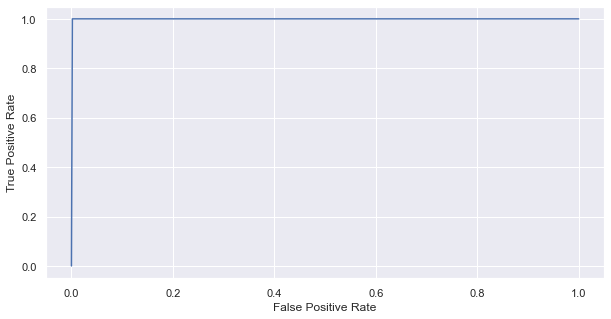

In [73]:
fpr_poly, tpr_poly, _ = metrics.roc_curve(y_test.Class,  pred_test_poly)

#create ROC curve
plt.figure(figsize=(10,5))
plt.plot(fpr_poly,tpr_poly)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [74]:
x_train_abs=abs(x_train)
x_test_abs=abs(x_test)

In [75]:
classifier_mb = MB()
classifier_mb.fit(x_train_abs, y_train)

C:\Users\toanb\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

In [76]:
# Evaluation on Test Data
test_pred_nb = classifier_mb.predict(x_test_abs)
accuracy_test = np.mean(test_pred_nb == y_test.Class)
accuracy_test

0.8629038991400184

In [77]:
pd.crosstab(test_pred_nb, y_test.Class)

Class,0,1
row_0,,
0,5636,1289
1,353,4699


In [78]:
# Training Data accuracy
train_pred_nb = classifier_mb.predict(x_train_abs)
accuracy_train = np.mean(train_pred_nb == y_train.Class)
accuracy_train

0.8646627303632135

In [79]:
classification_test_nb = classification_report(test_pred_nb, y_test.Class)
print(classification_test_nb)

              precision    recall  f1-score   support

           0       0.94      0.81      0.87      6925
           1       0.78      0.93      0.85      5052

    accuracy                           0.86     11977
   macro avg       0.86      0.87      0.86     11977
weighted avg       0.88      0.86      0.86     11977



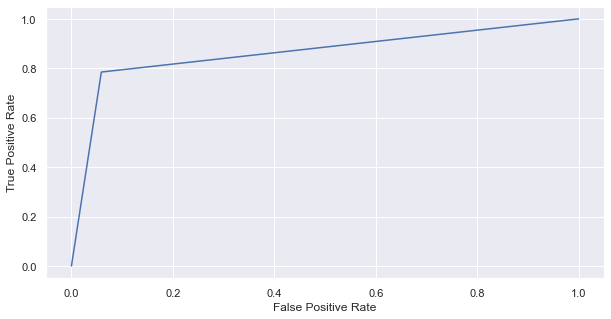

In [80]:
fpr_nb, tpr_nb, _ = metrics.roc_curve(y_test.Class,  test_pred_nb)

#create ROC curve
plt.figure(figsize=(10,5))
plt.plot(fpr_nb,tpr_nb)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [81]:
print("Logistic Regression (logit)\n",classification_test_logit)
print("KNN k=15 \n",classification_test_knn)
print("SVM (poly) \n",classification_test_svm_poly)
print("Naive Bayes \n",classification_test_nb)

Logistic Regression (logit)
               precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      5962
         1.0       1.00      0.99      0.99      6015

    accuracy                           0.99     11977
   macro avg       0.99      0.99      0.99     11977
weighted avg       0.99      0.99      0.99     11977

KNN k=15 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5981
           1       1.00      1.00      1.00      5996

    accuracy                           1.00     11977
   macro avg       1.00      1.00      1.00     11977
weighted avg       1.00      1.00      1.00     11977

SVM (poly) 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5978
           1       1.00      1.00      1.00      5999

    accuracy                           1.00     11977
   macro avg       1.00      1.00      1.00     11977
weighted avg       1.

In [82]:
best_k

3

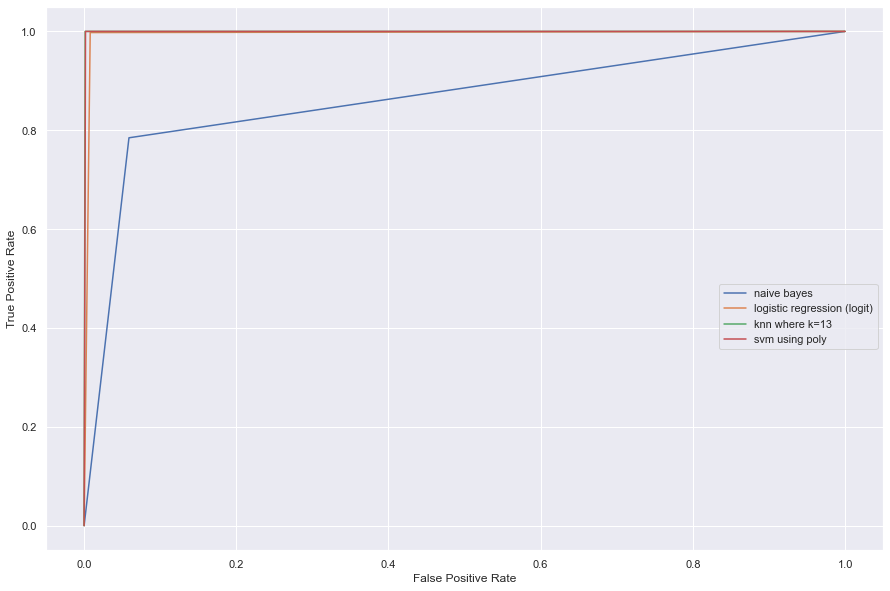

In [83]:
plt.figure(figsize=(15,10))
plt.plot(fpr_nb,tpr_nb,label='naive bayes')
plt.plot(fpr_logit,tpr_logit,label='logistic regression (logit)')
plt.plot(fpr_knn,tpr_knn,label='knn where k=13')
plt.plot(fpr_poly,tpr_poly,label='svm using poly')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5))
plt.show()